<a href="https://colab.research.google.com/github/tayyib-saddique/bbk-ds/blob/main/week5/non_binary_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Non-binary Classification: MNIST784 dataset

This notebook demonstrates how to build a simple multi-class classification model using **logistic regression** on the **MNIST784** dataset — a classic benchmark dataset of handwritten digits (0–9).
###  What You'll Learn:
- How to load and visualize image data using `scikit-learn` and `matplotlib`
- How to preprocess high-dimensional data for machine learning
- How to train a logistic regression classifier for multi-class problems
- How to evaluate model performance using accuracy and classification metrics
- How to interpret model weights visually





In [ ]:
import time
import numpy as np

The [MNIST dataset](https://www.openml.org/d/554) contains **70,000 grayscale images** of handwritten digits (0 to 9), each represented as a **28x28 pixel grid** (flattened into 784 features).
Import this benchmark dataset direct from the `openml` repository.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist['data'], mnist['target']
# X contains the features, and y the labels (digit classes 0–9）

print(f"Dataset shape: {X.shape}")

Dataset shape: (70000, 784)


In [ ]:
type(X)

pandas.core.frame.DataFrame

#### Visualize a Sample Image

 View the first image in the dataset to understand the input format. We reshape the flat vector back into a 28x28 image and display it.



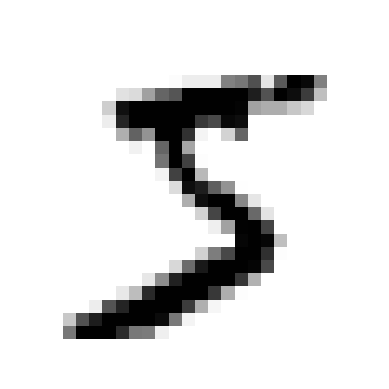

In [ ]:
import matplotlib.pyplot as plt

some_digit = X.iloc[0]

# Convert the Pandas Series to a NumPy array before reshaping
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

plt.show()

#### Split the data-set

* Prepare the dataset by dividing it into train and test set.
  
* First 6000 is used as training and the rest as test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Initialize and Train the Classifier

* Scale $X$ to have zero mean and unit variance [required by regressor]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Fit the model.

In [ ]:
from sklearn.linear_model import LogisticRegression

t0 = time.time()

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)

#display run time
run_time = time.time() - t0

print('Example run in %.3f s' % run_time)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Example run in 10.522 s


 #### Evaluate Sparsity and Accuracy
 We assess model performance using accuracy and coefficient sparsity. Sparsity tells us how many weights are exactly zero—useful for model simplicity and interpretability.

In [ ]:
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100

# compute accuracy
score = clf.score(X_test, y_test)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Sparsity with L2 penalty: 8.55%
Test score with L2 penalty: 0.9036


#### Classification report
Accuracy gives an overall view, but the classification report reveals how well each digit class is handled. Precision, recall, and F1-score provide a more nuanced view of performance.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#get prediction from the classifier
y_pred = clf.predict(X_test)

#print classification report
print(classification_report(
        y_test,
        y_pred
    ))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.93      0.97      0.95      1135
           2       0.92      0.87      0.89      1032
           3       0.89      0.89      0.89      1010
           4       0.88      0.93      0.90       982
           5       0.88      0.84      0.86       892
           6       0.93      0.93      0.93       958
           7       0.90      0.90      0.90      1028
           8       0.88      0.83      0.85       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



#### Visualize Classifier Weights
By reshaping the learned weights into images, we can see what features the model uses to distinguish digits. Bright or dark areas correspond to strong positive/negative influence.

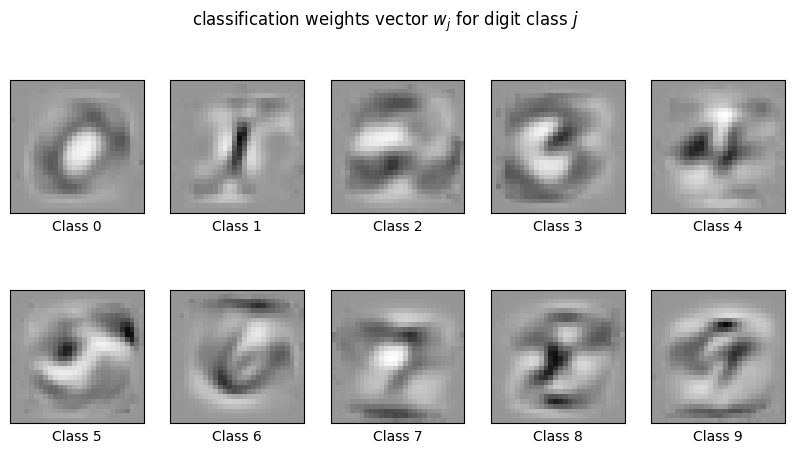

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()

plt.figure(figsize=(10, 5))

scale = np.abs(coef).max()

for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()